# CSE 152 : Introduction to Computer Vision, Spring 2018 – Assignment 5
### Instructor: Ben Ochoa
### Assignment Published On: Wednesday, May 23, 2018
### Due On: Saturday, June 9, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains only programming problems.
* All solutions must be written in this notebook
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit this notebook exported as a pdf. All answers and results must be present in the .pdf file. Points will not be given for answers and results only present in the .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Introduction
In this assignment, we will have a look at some simple techniques for object recognition, in particular,
we will try to recognize faces. The face data that we will use is derived from the Yale Face
Database. The database consists of 5760 images of
10 individuals, each under 9 poses and 64 different lighting conditions. The availability of such standardized
databases is important for scientific research as they are useful for benchmarking different
algorithms.
<img src = "fig/Figure1.png">
<center> Figure1: The Yale face database B. </center>

In this assignment, we will only use 640 images corresponding to a frontal orientation of the face.
These faces are included in the file yaleBfaces.zip. You will find the faces divided into five different
subsets. Subset 0 consists of images where the light source direction is almost frontal, so that almost
all of the face is brightly illuminated. From subset 1 to 4, the light source is progressively moved
toward the horizon, so that the effects of shadows increase and not all pixels are illuminated. The
faces in subset 0 will be used as training images, and subsets 1 to 4 will be used as test images.

## Environment Setup
util.py requires cv2 library. Please run "conda install opencv" in Powershell if your are in Windows or Terminal if you are in Mac/Linux.

In [1405]:
import os, sys
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_filter
import cv2 

In [1406]:
def load_subset(subsets, base_path='yaleBfaces'):
    # INPUT:
    #   subsets:  the index of the subset to load, or a vector of sebset
    #      indices.  For example, loadSubset([2]) loads subset2, whereas
    #      loadSubset([0,1]) loads subset0 and subset1
    #   base_path:  the path to the yale dataset directory.  If left blank,
    #     defaults to 'yaleBfaces'
    # 
    # OUTPUT:
    #   imgs: a NXd matrix of images, where N is the number of images and d is
    #      the number of pixels in each image
    #   labels: a vector of length N, storing the person or class ID of each
    #     image
    imgs = []
    labels = []
    
    for subset in subsets:
        directory = os.path.join(base_path, "subset" + str(subset))
        files = os.listdir(directory)
        for img in files:
            face = cv2.imread(os.path.join(directory,img), cv2.IMREAD_GRAYSCALE)
            imgs.append(face)
            labels.append(int(img.split('person')[1].split('_')[0]))
    return imgs, labels

In [1407]:
def draw_faces(img_list, col=10):
    # Draw faces
    fig = plt.figure(figsize = (30,30))
    if len(img_list) < col:
        col = len(img_list)
        row = 1
    else:
        row = int(len(img_list)/col)
    for sub_img in range(1,row*col+1):
        ax = fig.add_subplot(row, col, sub_img)
        ax.imshow(img_list[sub_img-1], cmap='gray')
        ax.axis('off')
    plt.show()

## Problem 1 (Programing):  Naive Recognition (15 points)
For this first problem, you will do face recognition by comparing the raw pixel values of the images.
Let subset 0 be the train set, and report classification accuracy on test sets 1 to 4. Use the nearest
neighbor classifier (1-NN) using the l2 norm (i.e. Euclidean distance).
1. (5 points) Once you have classified all images in a test set, report the average accuracy for each test set (percentage of correctly labeled images), i.e. 4 numbers.
2. (5 points) Comment on the performance, does it make sense? Is there any difference between
the sets?
3. (5 points) Show any two misclassified examples and explain why these might have been misclassified.

## Problem 1 Report

1.

Prediction Accuracy Report (using nearest neighbor): <br>

Subset 1 accuracy: 94.16666666666667%<br>
Subset 2 accuracy: 51.66666666666667%<br>
Subset 3 accuracy: 19.28571428571429%<br>
Subset 4 accuracy: 15.263157894736842%<br>

2.

The performance make sense. The reason is that subset 1 has very similar lighting with the trained image. This makes prediction more accurate. Other than that, for subset 2, the prediction is getting harder because some faces has shadows. Moving on to subset 3 and 4, the prediction becomes very hard because some face is almost just a black image because there is no light. Also, most of the faces in subset 3 and 4 are not illuminated by lights.


 
3.

The two images that is misclassified are plotted below

Figure 1.1 is misclassified because the face expression looks flatter than the original image. Moreover, it has darker lighting that might produce abiguity among the images in the trained subset. On the actual face that is mislabeled, it has similar lighting as the one in this misclassified image in subset 1. Thus, only by doing nearest neighbor could not be as accurate.


Figure 1.2 is clearly prone to misclassification since the image itself is very dark. In this case, it could have been any face in the database that is similar to the person in this image even though using the nearest neighbor algorithm only is not very accurate.

In [1408]:
def predict_naive(imgs, label0):
    # Your Code Here
    
    flatten_imgs = np.zeros((imgs.shape[0], imgs[0].shape[0] * imgs[0].shape[1]), np.int32)
    for i in range(0, imgs.shape[0]):
        flatten_imgs[i] = imgs[i].flatten()
    


    
    #load images and initialize labels
    imgs1, label1 = np.array(load_subset([1]))
#     print(label1)
    label1 = np.ones(label1.shape)

    imgs2, label2 = np.array(load_subset([2]))
    label2 = np.ones(label2.shape)
    
    
    imgs3, label3 = np.array(load_subset([3]))
    label3 = np.ones(label3.shape)
    
    
    imgs4, label4 = np.array(load_subset([4]))
    label4 = np.ones(label4.shape)
    

    #predict image subset 1
    for i in range(0, label1.shape[0]):
        #predict each image
        curr_flatten = imgs1[i].flatten()
        
        #find nearest neighbor from the trained classification
        minDistId = label0[0]
        currMinDist = -1
        for j in range(0, label0.shape[0]):
            currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
            if j == 0:
                minDistId = label0[j]
                currMinDist = currDist
            else:
                if currDist < currMinDist:
                    minDistId = label0[j]
                    currMinDist = currDist
                    
        
        label1[i] = minDistId
        
        
#     print(label1)
    
    
    #predict image subset 2
    for i in range(0, label2.shape[0]):
        #predict each image
        curr_flatten = imgs2[i].flatten()
        
        #find nearest neighbor from the trained classification
        minDistId = label0[0]
        currMinDist = -1
        for j in range(0, label0.shape[0]):
            currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
            if j == 0:
                minDistId = label0[j]
                currMinDist = currDist
            else:
                if currDist < currMinDist:
                    minDistId = label0[j]
                    currMinDist = currDist
        label2[i] = minDistId
    
    #predict image subset 3
    for i in range(0, label3.shape[0]):
        #predict each image
        curr_flatten = imgs3[i].flatten()
    
        #find nearest neighbor from the trained classification
        minDistId = label0[0]
        currMinDist = -1
        for j in range(0, label0.shape[0]):
            currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
            if j == 0:
                minDistId = label0[j]
                currMinDist = currDist
            else:
                if currDist < currMinDist:
                    minDistId = label0[j]
                    currMinDist = currDist
        label3[i] = minDistId
    
    #predict image subset 4
    for i in range(0, label4.shape[0]):
        #predict each image
        curr_flatten = imgs4[i].flatten()
        
        #find nearest neighbor from the trained classification
        minDistId = label0[0]
        currMinDist = -1
        for j in range(0, label0.shape[0]):
            currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
            if j == 0:
                minDistId = label0[j]
                currMinDist = currDist
            else:
                if currDist < currMinDist:
                    minDistId = label0[j]
                    currMinDist = currDist
        label4[i] = minDistId
    
    
    print(label0)
    draw_faces(imgs)
    
    return label1, label2, label3, label4

[3 1 1 3 1 1 3 3 1 3 3 1 1 3 7 9 5 7 7 9 5 5 9 7 9 7 5 5 7 9 9 7 5 5 9 10
 2 10 2 2 10 10 2 2 10 10 2 2 10 4 8 6 6 8 4 6 6 8 4 4 8 8 6 4 4 6 8 8 6 4]


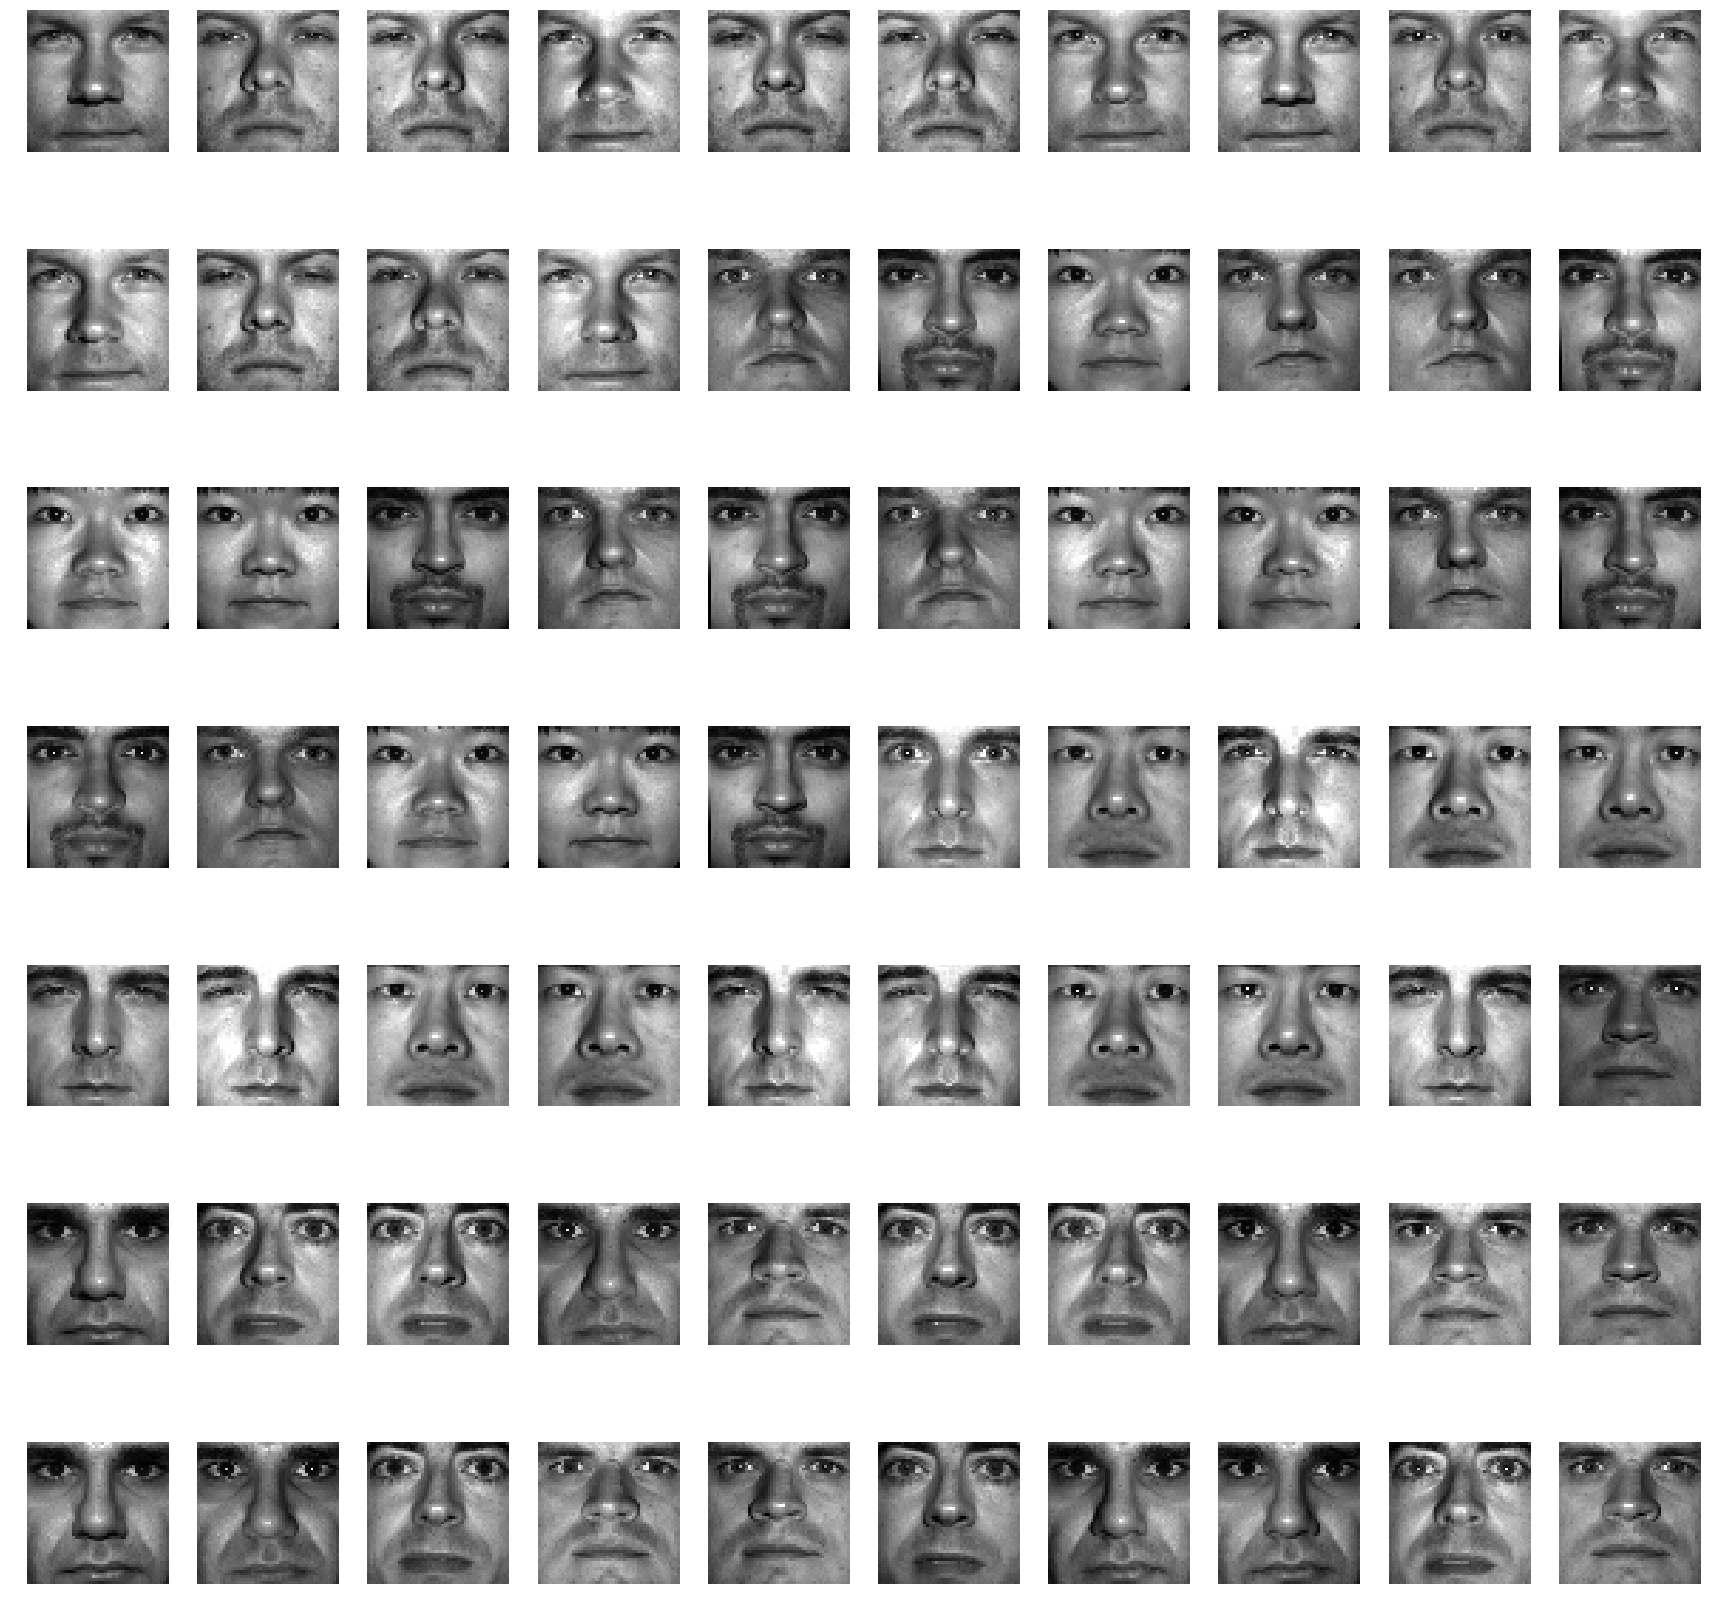

Subset 1 accuracy: 94.16666666666667%
Subset 2 accuracy: 51.66666666666667%
Subset 3 accuracy: 19.28571428571429%
Subset 4 accuracy: 15.263157894736842%


In [1409]:
#  _, label0 = np.array(load_subset([0]))
imgs, label0 = np.array(load_subset([0]))
label1, label2 ,label3, label4 = predict_naive(imgs, label0)
def evaluate(label1, label2, label3, label4):
    _, l = np.array(load_subset([1]))
    print("Subset 1 accuracy: " + str(np.count_nonzero((np.array(label1)-l) == 0) / len(label1) * 100) + "%")
    _, l = np.array(load_subset([2]))
    print("Subset 2 accuracy: " + str(np.count_nonzero((np.array(label2)-l) == 0) / len(label2) * 100) + "%")
    _, l = np.array(load_subset([3]))
    print("Subset 3 accuracy: " + str(np.count_nonzero((np.array(label3)-l) == 0) / len(label3) * 100) + "%")
    _, l = np.array(load_subset([4]))
    print("Subset 4 accuracy: " + str(np.count_nonzero((np.array(label4)-l) == 0) / len(label4) * 100) + "%")
evaluate(label1, label2 ,label3, label4)

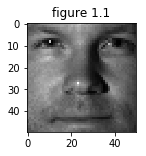

correct classification:  3
misclassified as label  7


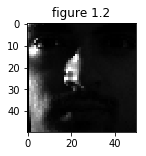

correct classification:  9
misclassified as label  4


In [1410]:
def show_mislabeled_img(imgs, labels):
    #Your Implementation here
    
    img1, l1 = np.array(load_subset([1]))
    miss1 = np.array(labels[0])-l1
    missImage1 = 0
    
    img4, l4 = np.array(load_subset([4]))
    miss2 = np.array(labels[3])-l4
    missImage2 = 0
    
    
    #find 2 misclassified label from 
    idxMiss1 = 0
    count = 0
    for i in range(0, miss1.shape[0]):
        #if it is non zero, then it is misclassified (last image in 1)
        if miss1[i] != 0:
#             print(i)
            idxMiss1 = i
            missImage1 = img1[i]
#             break
            
    idxMiss2 = 0
    count = 0
    for i in range(0, miss2.shape[0]):
        #if it is non zero, then it is misclassified
        if miss2[i] != 0:
            idxMiss2 = i
            missImage2 = img4[i]
            break
    
    fig = plt.figure(figsize=(2, 2))
    ax1 = fig.add_subplot(111)
    ax1.imshow(missImage1, cmap='gray')
    plt.title("figure 1.1")
    plt.show()
    print("correct classification: ", l1[idxMiss1])
    print("misclassified as label ", int(labels[0][idxMiss1]))
    plt.close()
    
    
    fig = plt.figure(figsize=(2, 2))
    ax1 = fig.add_subplot(111)
    ax1.imshow(missImage2, cmap='gray')
    plt.title("figure 1.2")
    plt.show()
    print("correct classification: ", l4[idxMiss2])
    print("misclassified as label ", int(labels[1][idxMiss2]))
    plt.close()
    
img1, l = np.array(load_subset([1]))
img4, l = np.array(load_subset([1]))
imgs = [img1, img4]
labels = [label1, label2, label3, label4]
show_mislabeled_img(imgs, labels)

# Problem 2 (Programing): k-Nearest Neighbors Recognition (10 points)

Instead of using a single nearest neighbor, sometimes it is useful to consider the consensus (majority
vote) of k-nearest neighbours. Repeat Part 1.1 using k-nearest neighbor classifier (k-NN).
1. (4 points) Test the performance for each test dataset using k ∈ 1, 3, 5. Note that you already
have the results for k = 1 from Part 1.
2. (4 points) Test the performance for each test dataset using the l1 norm rather than the l2
norm with k ∈ 1, 3, 5.
3. (2 points) Compare the performance of the classification with increasing k. Also comment
on whether changing the distance metric influenced the results (if they did). Briefly justify
the results observed.

## Problem 2 Report

1. L2 NORM

k = 1 (from problem 1)

Subset 1 accuracy: 94.16666666666667%<br>
Subset 2 accuracy: 51.66666666666667%<br>
Subset 3 accuracy: 19.28571428571429%<br>
Subset 4 accuracy: 15.263157894736842%<br>


k = 3

Subset 1 accuracy: 94.16666666666667% <br>
Subset 2 accuracy: 51.66666666666667% <br>
Subset 3 accuracy: 20.714285714285715% <br>
Subset 4 accuracy: 15.263157894736842% <br>

k = 5

Subset 1 accuracy: 95.0% <br>
Subset 2 accuracy: 55.00000000000001%<br>
Subset 3 accuracy: 20.0%<br>
Subset 4 accuracy: 13.157894736842104%<br>


2. L1 NORM

k = 1

Subset 1 accuracy: 94.16666666666667%<br>
Subset 2 accuracy: 51.66666666666667%<br>
Subset 3 accuracy: 21.428571428571427%<br>
Subset 4 accuracy: 13.157894736842104%<br>


k = 3

Subset 1 accuracy: 92.5%<br>
Subset 2 accuracy: 51.66666666666667%<br>
Subset 3 accuracy: 22.142857142857142%<br>
Subset 4 accuracy: 13.684210526315791%<br>

k = 5

Subset 1 accuracy: 93.33333333333333% <br>
Subset 2 accuracy: 50.0% <br>
Subset 3 accuracy: 22.142857142857142% <br>
Subset 4 accuracy: 16.315789473684212% <br>


3.

Increasing k when using L2 norm only affect a little more accuracy. The accuracy increases for L2 norm because sometimes a face have a good votes, but sometimes there are pictures that is very ambiguous which is luckily correct. Thus, the increase in accuracy is not significant for the first method. In the second method, I see the accuracy slightly decreases in some subsets. Yet, it is not a significant decrease, so increasing k do not really help in recognition. When using L1 norm, it is not significantly different from using L2 norm since both is a valid way to compare distance. Thus, the result itself will not be that much of a difference.

In [1411]:
def predict_knn_l2(imgs, label0, k):
    
    # Your Implemenation Here
    flatten_imgs = np.zeros((imgs.shape[0], imgs[0].shape[0] * imgs[0].shape[1]), np.int32)
    for i in range(0, imgs.shape[0]):
        flatten_imgs[i] = imgs[i].flatten()
    
    #load images and initialize labels
    imgs1, label1 = np.array(load_subset([1]))
#     print(label1)
    label1 = np.ones(label1.shape)

    imgs2, label2 = np.array(load_subset([2]))
    label2 = np.ones(label2.shape)
    
    
    imgs3, label3 = np.array(load_subset([3]))
    label3 = np.ones(label3.shape)
    
    
    imgs4, label4 = np.array(load_subset([4]))
    label4 = np.ones(label4.shape)
    


    #predict image subset 1
    for i in range(0, label1.shape[0]):
        #predict each image
        curr_flatten = imgs1[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label1[i] = currMaxVote
#         print(kNeighbors)
        
#     print(label1)

    #predict image subset 2
    for i in range(0, label2.shape[0]):
        #predict each image
        curr_flatten = imgs2[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label2[i] = currMaxVote
#         print(kNeighbors)
    
    #predict image subset 1
    for i in range(0, label3.shape[0]):
        #predict each image
        curr_flatten = imgs3[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label3[i] = currMaxVote
#         print(kNeighbors)
    
    #predict image subset 1
    for i in range(0, label4.shape[0]):
        #predict each image
        curr_flatten = imgs4[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    currDist = np.linalg.norm(flatten_imgs[j]-curr_flatten)
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label4[i] = currMaxVote
#         print(kNeighbors)
    


    return label1, label2, label3, label4

In [1412]:
def predict_knn_l1(imgs, label0, k):
    # Your Implemenation Here
    
    flatten_imgs = np.zeros((imgs.shape[0], imgs[0].shape[0] * imgs[0].shape[1]), np.int32)
    for i in range(0, imgs.shape[0]):
        flatten_imgs[i] = imgs[i].flatten()
    
    #load images and initialize labels
    imgs1, label1 = np.array(load_subset([1]))
#     print(label1)
    label1 = np.ones(label1.shape)

    imgs2, label2 = np.array(load_subset([2]))
    label2 = np.ones(label2.shape)
    
    
    imgs3, label3 = np.array(load_subset([3]))
    label3 = np.ones(label3.shape)
    
    
    imgs4, label4 = np.array(load_subset([4]))
    label4 = np.ones(label4.shape)
    

    
#     print("flatten")
#     print(flatten_imgs[0])
#     print("current flatten")
#     curr_flatten = imgs1[0].flatten()
#     print(curr_flatten)
#     absDifference = np.absolute(flatten_imgs[0] - curr_flatten)
#     print("abs difference")
#     print(absDifference)
#     currDist = sum(absDifference)
#     print("sum: ", currDist)
                    
    
    #predict image subset 1
    for i in range(0, label1.shape[0]):
        #predict each image
        curr_flatten = imgs1[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    
                    #get L1 Norm
                    
                    absDifference = np.absolute(flatten_imgs[j] - curr_flatten)
                    currDist = sum(absDifference)
                    
                        
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label1[i] = currMaxVote
        
        
        
        
        
        
    #predict image subset 2
    for i in range(0, label2.shape[0]):
        #predict each image
        curr_flatten = imgs2[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    
                    #get L1 Norm
                    
                    absDifference = np.absolute(flatten_imgs[j] - curr_flatten)
                    currDist = sum(absDifference)
                    
                        
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label2[i] = currMaxVote
        
        
        
    #predict image subset 3
    for i in range(0, label3.shape[0]):
        #predict each image
        curr_flatten = imgs3[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    
                    #get L1 Norm
                    
                    absDifference = np.absolute(flatten_imgs[j] - curr_flatten)
                    currDist = sum(absDifference)
                    
                        
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label3[i] = currMaxVote
        
        
        
    #predict image subset 4
    for i in range(0, label4.shape[0]):
        #predict each image
        curr_flatten = imgs4[i].flatten()
        
        #find K nearest neighbor from the trained classification
        kNeighbors = {}
        idxNearestNeighbors = []
        currMaxVote = -1
        
        for l in range(0, k):
            minDistId = 0
            currMinDist = -1
            minDistIdx = -1
            
            for j in range(0, label0.shape[0]):
                
                #first check if current index is already inside idxNearestNeighbors
                if j not in idxNearestNeighbors:
                    
                    #get L1 Norm
                    absDifference = np.absolute(flatten_imgs[j] - curr_flatten)
                    currDist = sum(absDifference)
                    
                        
                    if minDistId == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = j
                    elif j == 0:
                        minDistId = label0[j]
                        currMinDist = currDist
                        minDistIdx = 0
                    else:
                        if currDist < currMinDist:
                            minDistId = label0[j]
                            currMinDist = currDist
                            minDistIdx = j
                      
            if minDistId in kNeighbors: 
                kNeighbors[minDistId] += 1
            else:
                kNeighbors[minDistId] = 1

            idxNearestNeighbors.append(minDistIdx)

            if currMaxVote == -1:
                currMaxVote = minDistId
            elif kNeighbors[currMaxVote] < kNeighbors[minDistId]:
                currMaxVote = minDistId
        
        
        
        #now get the maximum vote
        label4[i] = currMaxVote  
        
    
    return label1, label2, label3, label4

In [1413]:
k = 5
imgs, label0 = np.array(load_subset([0]))
def evaluate(label1, label2, label3, label4):
    _, l = np.array(load_subset([1]))
    print("Subset 1 accuracy: " + str(np.count_nonzero((np.array(label1)-l) == 0) / len(label1) * 100) + "%")
    _, l = np.array(load_subset([2]))
    print("Subset 2 accuracy: " + str(np.count_nonzero((np.array(label2)-l) == 0) / len(label2) * 100) + "%")
    _, l = np.array(load_subset([3]))
    print("Subset 3 accuracy: " + str(np.count_nonzero((np.array(label3)-l) == 0) / len(label3) * 100) + "%")
    _, l = np.array(load_subset([4]))
    print("Subset 4 accuracy: " + str(np.count_nonzero((np.array(label4)-l) == 0) / len(label4) * 100) + "%")
    

print("k = " + str(k))
print("By using l2 norm: ")
label1, label2 ,label3, label4 = predict_knn_l2(imgs, label0, k)
evaluate(label1, label2 ,label3, label4)
print("By using l1 norm: ")
label1, label2 ,label3, label4 = predict_knn_l1(imgs, label0, k)
evaluate(label1, label2 ,label3, label4)

k = 5
By using l2 norm: 
Subset 1 accuracy: 95.0%
Subset 2 accuracy: 55.00000000000001%
Subset 3 accuracy: 20.0%
Subset 4 accuracy: 13.157894736842104%
By using l1 norm: 
Subset 1 accuracy: 93.33333333333333%
Subset 2 accuracy: 50.0%
Subset 3 accuracy: 22.142857142857142%
Subset 4 accuracy: 16.315789473684212%


## Problem 3 (Programing): Recognition Using Eigenfaces (25 points)
<ul>
<li>(5 points) Write a function eigenTrain(trainset,k) that takes as input a N × d matrix
trainset of vectorized images from subset 0, where N = 70 is the number of training images
and d = 2500 is the number of pixels in each training image. Perform PCA on the data and
compute the top k = 20 eigenvectors. Return the k × d matrix of eigenvectors W, and a d
dimensional vector mu encoding the mean of the training images.</li>

<li> (2 points) Rearrange each of the top 20 eigenvectors you obtained in the previous step into a
2D image of size 50 × 50. Display these images by appending them together into a 500 × 100
image (a 10 × 2 grid of images).</li>

<li>(2 points) Explain the objective of performing PCA on the training images. What does this
achieve?</li>
<li>(2 points) Select one image per person from subset 0 (e.g., the 5 images person01 01.png,
person02 01.png, ... , person10 01.png). Show what each of these images would look like
when using only the top k eigenvectors to reconstruct them, for k = 1, 2, 3, 4, 5, ...10. This
reconstruction procedure should project each image into a k dimensional space, project that k
dimensional space back into a 2500 dimensional space, and finally resize that 2500 vector into
a 50 × 50 image.</li>
<ul>
<li>(10 points) Write a function called eigenTest(trainset,trainlabels,testset,W,mu,k)
that takes as input :

<li>The same N × d matrix trainset of vectorized images from subset 0</li>
<li>An N dimensional vector trainlabels that encodes the class label of each training image
(e.g., 1 for person01, 2 for person02, etc.)</li>
<li>An M × d matrix testset of M vectorized images from one of the test subsets (1-4)</li>
<li>The output of PCA i.e. W and mu, and the number of eigenvectors to use k</li>
</ul>
Project each image from trainset and testset onto the space spanned by the first k eigenvectors.
For each test image, find the nearest neighbor (1-NN) in the training set using an L2
distance in this lower dimensional space and predict the class label as the class of the nearest
training image. Your function should return an M dimensional vector testlabels encoding
the predicted class label for each test example. Evaluate eigenTest on each test subset 1-4
separately for values k = 1...20 (so it should be evaluated 4 × 20 times). Plot the error rate
(fraction of incorrect predicted class labels) of each subset as a function of k in the same plot,
and use the Python legend function add a _legend_ to your plot.</li>
<li>(2 points) Repeat the experiment from the previous step, but throw out the first 4 eigenvectors.
That is, use k eigenvectors starting with the 5th eigenvector. Produce a plot similar to the one
in the previous step. How do you explain the difference in recognition performance from the
previous part?</li>
<li>(2 points) Explain any trends you observe in the variation of error rates as you move from
subsets 1 to 4 and as you increase the number of eigenvectors. Use images from each subset
to reinforce your claims.</li>
</ul>


## Problem 3 Report

### Bullet Point Number: <br>

1. <br>

eigenvectors of W (printed below)

mean of the training image (printed below)



2.

The problem was to plot the top 20 eigenvector generated from the svd of the mean-deviation (data matrix). Refer to image titled as "top 20 eigenvector 500x100 image".


3.

The objective of PCA is to reduce dimension such that we can project the "noise" in the same dimension, so that we can later perform FLD to determine class difference between faces.

4.

The problem was to project image into k-dimension (1, 2, 3, ..., 10). The images for each label 
are plotted below.

5.

(sub bullet point 10 points question)

The problem was to create a function eigenTest to plot the error rate when doing dimension reduction. The errors are plotted below.

6.

This is similar to problem 5 (error rates are plotted below). This increases the accuracy of recognition instead when we throw out the first 4 eigenvectors. In this case, by not projecting to lower dimension using the line of the biggest variance may give us better spread in the data.

7.

As I move from subset 1 to 4, subset 3 & 4 has the most error rates since the picture's lighting are not clear. There are some faces with fades. This makes recognition hard. On the other hand, subset 1 & 2 has very clear images even though there are some faces that is faded. This makes recognition a lot easier than subset 3 & 4. As I increase the number of eigenvectors, the error rates decreases because we have more information on the face by having more eigenvectors.

In [1414]:
imgs, labels = load_subset([0])
trainset = np.reshape(imgs,(70, 2500))

In [1415]:
def eigenTrain(trainset,k):
    # Your Implementation Here

    #get mean image
    meanImage = np.zeros((2500,1))
    
    for i in range(0, trainset.shape[1]):
        #calculate mean for each dimensions / variable
        meanImage[i] = np.mean(trainset.T[:][i])
    meanImage = meanImage.T
    
#     print(trainset)
#     av = 0
#     for i in range(0, trainset.shape[0]):
#         av += trainset[i][2]
#     av = av/70
#     print(av)
        
    #x hat
    meanDeviation = trainset - meanImage
    
    #A
#     covariance = np.dot(meanDeviation, meanDeviation.T) / (meanDeviation.shape[0]-1)
#     a_matrix = np.dot(meanDeviation.T, meanDeviation)
    
    #perform SVD to get principal component coefficients
    u, d, v_t = np.linalg.svd(meanDeviation)
    
  
    eigvecs= np.zeros((k, 2500))
    for i in range(0, eigvecs.shape[0]):
        for j in range(0, eigvecs.shape[1]):
            eigvecs[i][j] = v_t[i][j]
            
    mu = meanImage
    
    
#     for i in range(0, eigvecs.shape[0]):
#         eigvecs[i] = eigvecs[i] / np.linalg.norm(eigvecs[i])
    
    return eigvecs, mu

In [1416]:
eigvecs, mu = eigenTrain(trainset, 20)

print("eigen vector for k = 20 (W):")
for i in range(0, eigvecs.shape[0]):
    print(eigvecs[i][:])
    
print()
print("mean image (mu):")
print(mu)

eigen vector for k = 20 (W):
[-0.01329749 -0.01226758 -0.01200115 ... -0.01156571 -0.0109736
 -0.00960218]
[-0.03658463 -0.03534601 -0.04161088 ...  0.00533421 -0.00219448
  0.00180202]
[ 0.01750791  0.01206912  0.00811086 ... -0.03478369 -0.03718597
 -0.03922186]
[-0.0128782  -0.02722133 -0.03361381 ... -0.02266508 -0.0307042
 -0.0359619 ]
[ 0.00711232 -0.01128002 -0.00223379 ...  0.04328514  0.05369532
  0.05919527]
[-0.01606183 -0.00251365  0.0011363  ...  0.01481702  0.01839585
  0.00308211]
[-0.05127075 -0.04214609 -0.05253474 ...  0.00023876 -0.02383142
 -0.03123564]
[ 0.00487884 -0.0195063  -0.03725699 ... -0.00540638 -0.01573375
 -0.02284303]
[-0.04175217 -0.04681341 -0.0427523  ...  0.00942696  0.02796541
  0.02862219]
[ 0.00121812 -0.01604525 -0.01289027 ... -0.00788869  0.00894948
  0.01135782]
[-0.00134652 -0.00662064 -0.00345932 ... -0.00329953 -0.01790434
 -0.02237927]
[-0.00465849  0.00898531 -0.00088594 ... -0.00656334 -0.00945741
 -0.00088981]
[-0.00994449 -0.01040244 

In [1417]:
# def displayImages(k):
def displayImages(eigvecs):
    # Display the 500 x 100 Image
    # Your Implementation Here (BULLET POINT 2)
    print(eigvecs.shape)
    
    im1 = np.reshape(eigvecs[0], (50, 50))
    im2 = np.reshape(eigvecs[1], (50, 50))
    left_column = np.hstack((im1, im2))
    for i in range(2, 10):
        im1 = np.reshape(eigvecs[i], (50, 50))
        left_column = np.hstack((left_column, im1))
        
        
    im1 = np.reshape(eigvecs[10], (50, 50))
    im2 = np.reshape(eigvecs[11], (50, 50))
    right_column = np.hstack((im1, im2))
    for i in range(12, 20):
        im1 = np.reshape(eigvecs[i], (50, 50))
        right_column = np.hstack((right_column, im1))
    
    image_appended = np.vstack((left_column, right_column))
    
    
    #plot the eigenvectors
    figure = plt.figure(figsize=(12,12))
    ax = figure.add_subplot(111)
    ax.imshow(image_appended, cmap = 'gray')
    plt.title("top 20 eigenvector 500x100 image")
    plt.show()
    plt.close()
        

(20, 2500)


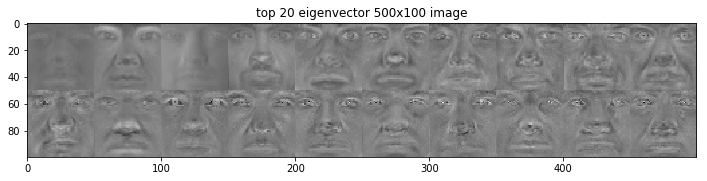

In [1418]:
displayImages(eigvecs)

In [1419]:
def showImagePerPerson(eigvecs, mu, k):

    imgs, labels = load_subset([0])
    
    #     1 = idx 1
    #     2 = idx 36
    #     3 = idx 0
    #     4 = idx 69
    #     5 = idx 33
    #     6= idx 68
    #     7 = idx 31
    #     8 = idx 67
    #     9 = idx 34
    #     10 = idx 35
    persons = np.ones((10,1), dtype='uint8')
    
    #persons 2
    persons[1] = 36
    persons[2] = 0
    persons[3] = 69
    persons[4] = 33
    persons[5] = 68
    persons[6] = 31
    persons[7] = 67
    persons[8] = 34
    persons[9] = 35
    for p in range(0, 10):
        idxPerson = persons[p][0]

        person = imgs[idxPerson]
        print("person label ", labels[idxPerson])
        
        
        fig2 = plt.figure(figsize=(2,2))
        plt.imshow(person, cmap='gray')
        plt.title("original person before reduction")
        plt.show()
        plt.close()
        
        
        
        fig = plt.figure(figsize=(20,20))

        im = person
        person_reshape = np.reshape(im, (1,2500))
        person_reshape =  person_reshape - mu
        
        top_k_eig = eigvecs[0]
        top_k_eig = np.reshape(top_k_eig, (1, 2500))

        
        im = np.dot(person_reshape, top_k_eig.T)
        im = np.dot(im, top_k_eig)
        im += mu
        disp = np.reshape(im ,(50, 50))


        temp_eig = np.reshape(eigvecs[1], (1, 2500))
        top_k_eig = np.vstack((top_k_eig, temp_eig))
        im = np.dot(person_reshape, top_k_eig.T)
        im = np.dot(im, top_k_eig)
        im += mu
        disp2 = np.reshape(im ,(50, 50))


        img = np.hstack((disp, disp2))


        for i in range(3, k+1):
            temp_eig = np.reshape(eigvecs[1], (1, 2500))
            top_k_eig = np.vstack((top_k_eig, temp_eig))
            im = np.dot(person_reshape, top_k_eig.T)
            im = np.dot(im, top_k_eig)
            im += mu
            disp = np.reshape(im ,(50, 50))
            img = np.hstack((img, disp))


        plt.imshow(img, cmap ='gray')
        plt.title("top 1 - 10 eigenvector dimension reduction")
        plt.show()
        plt.close()
        
        
        
    

person label  1


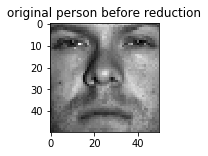

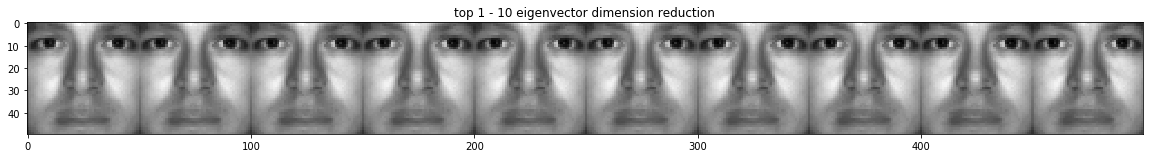

person label  2


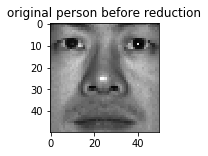

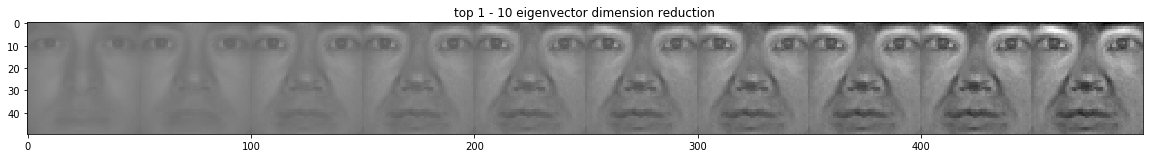

person label  3


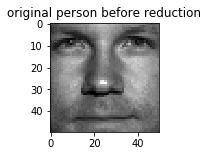

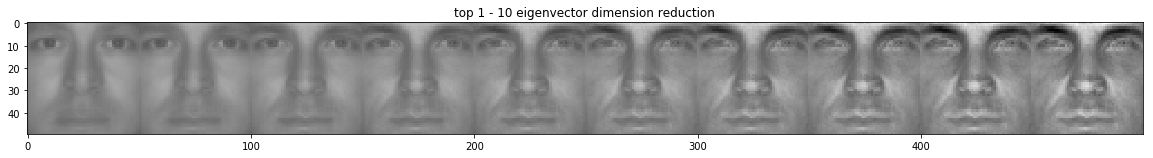

person label  4


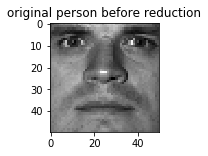

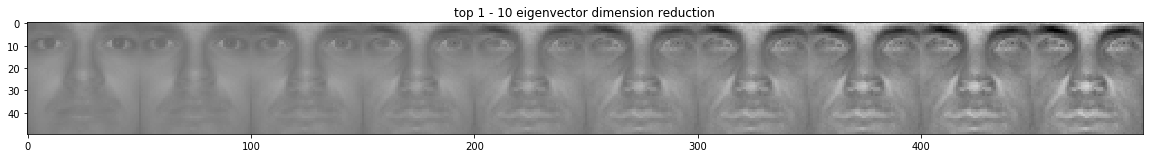

person label  5


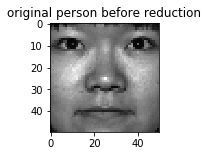

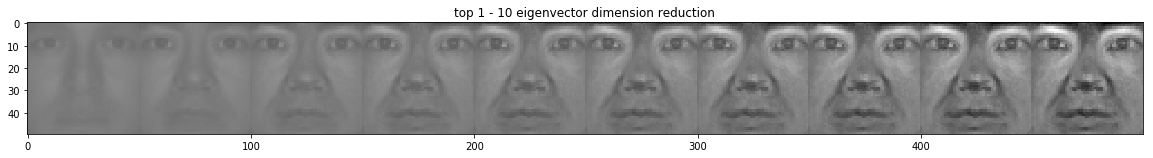

person label  6


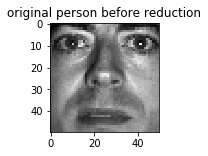

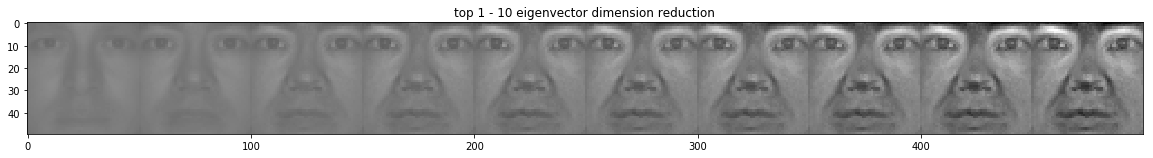

person label  7


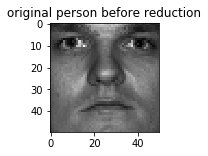

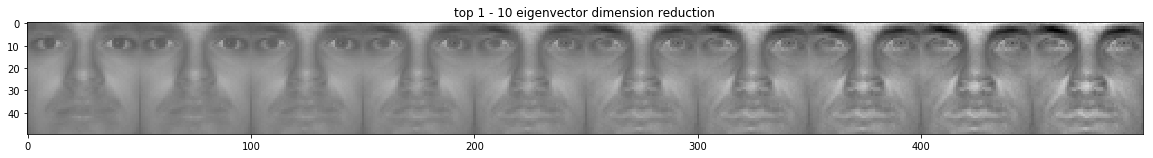

person label  8


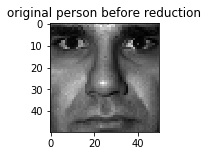

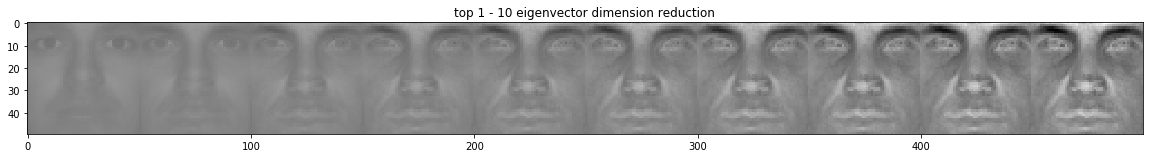

person label  9


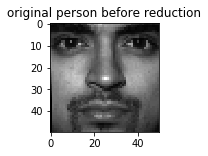

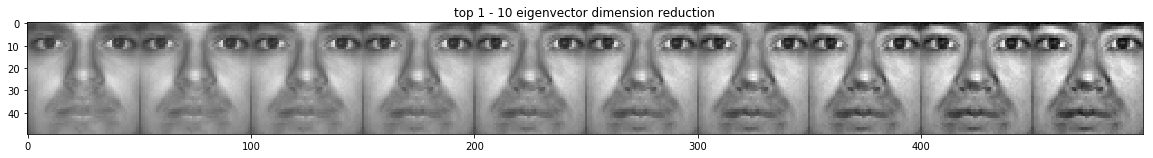

person label  10


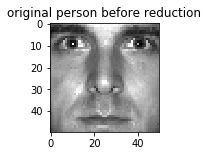

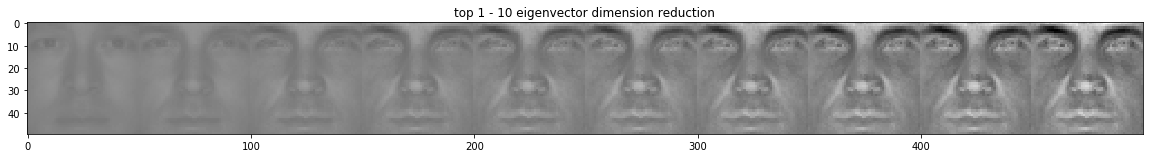

In [1420]:
showImagePerPerson(eigvecs, mu, 10)

In [1421]:
def eigenTest(trainset,trainlabels,testset,W,mu,k):
    # Your Implementation Here
    # trainset: 
    #    N × d matrix trainset of vectorized images from subset 0
    # trainlabels:
    #    An N dimensional vector trainlabels that encodes the class 
    #    label of each training image 
    # testset:
    #    M × d matrix testset of M vectorized images from one of 
    #    the test subsets (1-4)
    # W:
    #    Coefficients
    # mu:
    #    Estimated mean
    # k:
    #    number of eigenvectors 
    
    #get top k eigenvectors
    
    top_k_eig = W[0]
    top_k_eig = np.reshape(top_k_eig, (1, 2500))
    
    for i in range(1,  k):
        next_eig = W[i]
        next_eig = np.reshape(next_eig, (1, 2500))
        top_k_eig = np.vstack((top_k_eig, next_eig))
    
    
    top_k_eig = top_k_eig.T
    
    #reduce dimension of trainset and testset
    
    projected_trainset = trainset - mu
    projected_trainset = np.dot(projected_trainset, top_k_eig)
    
    
    projected_testset = testset - mu
    projected_testset = np.dot(projected_testset, top_k_eig)
    
    
    #predict labels of the projected testset according to trainset

    testlabels = np.zeros((testset.shape[0],))

    for i in range(0, testlabels.shape[0]):
        #predict each image
        curr_flatten = projected_testset[i]
        
        #find nearest neighbor from the trained classification
        minDistId = trainlabels[0]
        currMinDist = -1
        for j in range(0, trainlabels.shape[0]):
            currDist = np.linalg.norm(projected_trainset[j]-curr_flatten)
            if j == 0:
                minDistId = trainlabels[j]
                currMinDist = currDist
            else:
                if currDist < currMinDist:
                    minDistId = trainlabels[j]
                    currMinDist = currDist
        testlabels[i] = minDistId
        
        
    return testlabels

    
    

[81.66666667 47.5        54.16666667 45.83333333 30.83333333 15.
 13.33333333  9.16666667 10.          6.66666667  5.83333333  5.83333333
  5.83333333  5.83333333  5.83333333  5.83333333  5.83333333  5.83333333
  5.83333333  5.83333333]
[89.16666667 70.         84.16666667 82.5        74.16666667 65.83333333
 63.33333333 60.83333333 57.5        54.16666667 50.83333333 50.
 50.         50.         50.         50.         50.         50.
 50.         50.        ]
[90.71428571 89.28571429 89.28571429 86.42857143 85.71428571 82.14285714
 84.28571429 83.57142857 80.         80.71428571 81.42857143 82.14285714
 82.14285714 82.14285714 82.14285714 82.14285714 82.14285714 81.42857143
 81.42857143 81.42857143]
[90.         90.         91.05263158 86.84210526 86.84210526 86.31578947
 86.31578947 86.84210526 85.26315789 86.31578947 86.84210526 86.84210526
 86.31578947 85.78947368 85.26315789 85.26315789 85.26315789 85.78947368
 85.78947368 85.78947368]


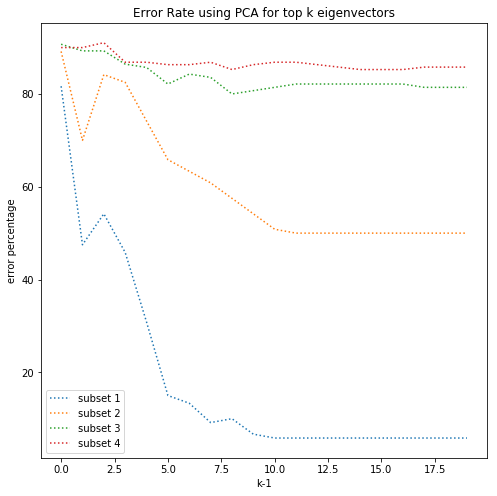

In [1422]:
imgs, trainlabels = load_subset([0])
trainlabels = np.reshape(trainlabels, (70))
trainset = np.reshape(imgs,(70, 2500))

imgs1, label1 = load_subset([1])
testset = np.reshape(imgs1,(120, 2500))

eigvecs, mu = eigenTrain(trainset, 20)

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label1)-testlabels) == 0) / len(label1) * 100
    
print(errors)
#plot error
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(errors, ":", label = 'subset 1')
# ax.legend(['error rate'])
ax.set_xlabel("k-1")
ax.set_ylabel("error percentage")
plt.title("Error Rate using PCA for top k eigenvectors")



#for subset 2
imgs2, label2 = load_subset([2])
testset = np.reshape(imgs2,(120, 2500))

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label2)-testlabels) == 0) / len(label2) * 100
print(errors)    
#plot error
ax.plot(errors, ":", label = 'subset 2')



#for subset 3

#for subset 2
imgs3, label3 = load_subset([3])
testset = np.reshape(imgs3,(140, 2500))

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label3)-testlabels) == 0) / len(label3) * 100
print(errors)    
#plot error
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
ax.plot(errors, ":", label = 'subset 3')
# ax.legend(['error rate'])
# ax.set_xlabel("k")
# ax.set_ylabel("error percentage")
# plt.title("Subset 3 Error Rate")
# plt.show()
# plt.close()


imgs4, label4 = load_subset([4])
testset = np.reshape(imgs4,(190, 2500))

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label4)-testlabels) == 0) / len(label4) * 100
print(errors)    
#plot error
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
ax.plot(errors, ":", label = 'subset 4')
# ax.legend(['error rate'])
# ax.set_xlabel("k")
# ax.set_ylabel("error percentage")
# plt.title("Subset 4 Error Rate")

ax.legend()
plt.show()
plt.close()



ERROR RATE WITH THROWING THE FIRST 4 EIGENVECTORS
[77.5        49.16666667 28.33333333 14.16666667  5.83333333  9.16666667
  4.16666667  2.5         3.33333333  3.33333333  3.33333333  4.16666667
  3.33333333  2.5         2.5         2.5         1.66666667  1.66666667
  1.66666667  1.66666667]
[80.83333333 77.5        64.16666667 51.66666667 38.33333333 35.83333333
 29.16666667 25.         20.         17.5        18.33333333 18.33333333
 18.33333333 16.66666667 16.66666667 15.         15.         14.16666667
 14.16666667 13.33333333]
[83.57142857 87.14285714 82.85714286 79.28571429 80.         75.
 72.85714286 70.         71.42857143 71.42857143 68.57142857 67.14285714
 67.85714286 67.14285714 65.71428571 64.28571429 63.57142857 62.14285714
 62.85714286 64.28571429]
[86.84210526 93.15789474 87.89473684 92.10526316 90.52631579 90.
 90.         87.36842105 89.47368421 88.94736842 86.84210526 86.31578947
 86.84210526 86.84210526 87.36842105 87.36842105 87.89473684 86.84210526
 87.36842105

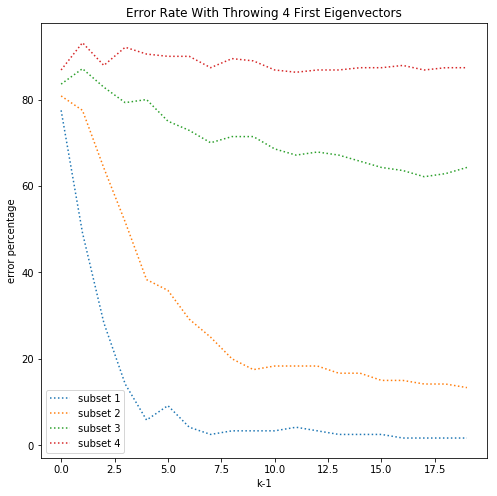

In [1423]:
# AFTER THROWING 4 FIRST EIGENVECTORS
imgs, trainlabels = load_subset([0])
trainlabels = np.reshape(trainlabels, (70))
trainset = np.reshape(imgs,(70, 2500))


#throw the first 4 eigen vectors
eigvecs, mu = eigenTrain(trainset, 24)
eigvecs = eigvecs[4:]

imgs1, label1 = load_subset([1])
testset = np.reshape(imgs1,(120, 2500))

print("ERROR RATE WITH THROWING THE FIRST 4 EIGENVECTORS")
#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label1)-testlabels) == 0) / len(label1) * 100
print(errors)   
#plot error
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(errors, ":", label = 'subset 1')
# ax.legend(['error rate'])
ax.set_xlabel("k-1")
ax.set_ylabel("error percentage")
plt.title("Error Rate With Throwing 4 First Eigenvectors")



#for subset 2
imgs2, label2 = load_subset([2])
testset = np.reshape(imgs2,(120, 2500))

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label2)-testlabels) == 0) / len(label2) * 100
print(errors)    
#plot error
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
ax.plot(errors, ":", label = 'subset 2')
# ax.legend(['error rate'])
# ax.set_xlabel("k")
# ax.set_ylabel("error percentage")
# plt.title("Subset 2 Error Rate")
# plt.show()
# plt.close()



#for subset 3
imgs3, label3 = load_subset([3])
testset = np.reshape(imgs3,(140, 2500))

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label3)-testlabels) == 0) / len(label3) * 100
print(errors)   

#plot error
ax.plot(errors, ":", label = 'subset 3')


imgs4, label4 = load_subset([4])
testset = np.reshape(imgs4,(190, 2500))

#plot the errors for k = 1 to k = 20
errors = np.zeros((20))
for i in range(1, 21):
    testlabels = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label4)-testlabels) == 0) / len(label4) * 100
print(errors)
#plot error
ax.plot(errors, ":", label = 'subset 4')
ax.legend()
plt.show()
plt.close()

## Problem 4 (Programing): Recognition Using Fisherfaces (20 points)
<ul><li>(10 points) Write a function called fisherTrain(trainset,trainlabels,c) that
takes as input the same N × d matrix trainset of vectorized images from subset 0, the corresponding
class labels trainlabels, and the number of classes c = 10. Your function should
do the following :
<ul><li> Compute the mean $mu$ of the training data, and use PCA to compute the first N − c
principal components. Let this be $W_{PCA}$.</li>
<li> Use $W_{PCA}$ to project the training data into a space of dimension (N − c).</li>
<li> Compute the between-class scatter matrix $S_B$ and the within class scatter matrix $S_W$ on
the (N − c) dimensional space from the previous space.</li>
<li> Compute $W_{FLD}$, by solving for the generalized eigenvectors of the (c−1) largest generalized
eigenvalues for the problem $S_Bw_i = λ_iS_Ww_i$. You can use inbuilt functions to solve
for the generalized eigenvalues of $S_B$ and $S_W$.</li></ul>
<li>The fisher bases will be a $W = W_{FLD}W_{PCA}$, where W is (c − 1) × d dimensional, $W_{FLD}$
is (c − 1) × (N − c) dimensional, and $W_{PCA}$ is (N − c) × d dimensional.</li>
<li>(5 points) As in the Eigenfaces exercise, rearrange the top 9 Fisher bases you obtained in the
previous part into images of size 50 × 50 and stack them into one big 450 × 50 image.</li>
<li>(5 points) As in the eigenfaces exercise, perform recognition on the testset with Fisherfaces.
As before, use a nearest neighbor classifier (1-NN), and evaluate results separately for each
test subset 1-4 for values k = 1...9. Plot the error rate of each subset as a function of k in
the same plot, and use the legend function in Python to add a _legend_ to your
plot. Explain any trends you observe in the variation of error rates with different subsets and
different values of k, and compare performance to the Eigenface method. paper-link</li></ul>

## Problem 4 Report

Bullet Points Number:

1 & 2. 

In this problem, we are asked to compute the between-class scatter matrix, within class scatter matrix, and Wfld. Then, use Wfld to compute W. The results for these problems are printed below.

3.

Eigenfaces for top 9 fisher bases are plotted below

4.


- For each subset, we see similar error rate trends with the one using eigenface. This is because the same reason as before. For subset 1 & 2, we can see lower error rates because of the faces are more clear than subset 3 & 4. Most faces in subset 3 & 4 are hard to recognize because it is almost similar to comparing image that do not have lights (all black).


- Comparing the results of using Fisherbases to Eigenface method, we see that we get a much lower error rate than only using PCA, which only lowers the dimension (comparisons are printed below). Using Fisherbases, we are able to maximize variances between classes, which will make us perform better recognition. Error rates are plotted below.


In [1424]:
from scipy.linalg import eigh as eigh
def fisherTrain(trainset, trainlabel, c):
    
    
    #compute mean mu and use PCA

    eigvecs, mu = eigenTrain(trainset, 70-c)
    
    
    #project the training data into space of dimension(N-c)
    projected_training_data = np.zeros(trainset.shape)
    projected_training_data = trainset - mu
    projected_training_data = np.dot(projected_training_data, eigvecs.T)
    

    
    
    #get mean image of the current lower dimension
    meanImage = np.zeros((60,1))
    for i in range(0, projected_training_data.shape[1]):
        #calculate mean for each dimensions / variable
#         meanImage[i] = sum(projected_training_data.T[:][i]) / projected_training_data.shape[0]#np.mean(projected_training_data.T[:][i])
        meanImage[i] = np.mean(projected_training_data.T[:][i])
    meanImage = meanImage.T
    

    
    #get sample count and separate classes
    classes = []
    for i in range(0, 10):
        classes.append([])


    sampleCount = np.zeros((10))
    for i in range(0, projected_training_data.shape[0]):
        sampleCount[trainlabel[i] - 1] += 1
        classes[trainlabel[i] - 1].append(i)
    
    
    #get mean of every class samples
    meanClass = np.zeros((10, 60))
    
    for i in range(0, len(classes)):
        for j in range(0, 60):
            av = 0
            for k in range(0, len(classes[i])):
                av += projected_training_data[classes[i][k]][j]
            av = av / sampleCount[i]
            meanClass[i][j] = av


                
#     print(len(classes[0]))
#     print(trainlabel)
#     print(sampleCount)
#     print(meanClass[0])
    
    
#     average = 0
#     for i in range(0, projected_training_data.shape[0]):
#         if trainlabel[i] == 1:
#             average += projected_training_data[i][59]
#     average = average / 7
#     print(average)
    
   

#     print(projected_training_data)
#     print("mean image")
#     print(meanImage.shape)
#     print(meanImage)
    
    
    
    #compute Sb (between-class scatter)
    sb = np.zeros((60,60))
    for i in range(0, len(classes)):
        meanDiff = meanClass[i] - meanImage
        sb += sampleCount[i] * np.outer(meanDiff.T,meanDiff)
#         sb += sampleCount[i] * np.outer(meanDiff,meanDiff.T)
#     print(sb)
    
#     a = meanClass[0] - meanImage
#     print(np.dot(a.T, a))
#     print("After multiply")
#     print(sampleCount[0] * np.dot(a.T, a))


    #mean deviation of lower dimension
#     print(projected_training_data)

    print("meanImage after projecting training data to lower dimension:")
    print(meanImage.shape)
    print(meanImage[0])
    
    #compute Sw (within-class scatter)
    sw = np.zeros((60,60))#0
    for i in range(0, len(classes)):
            for k in range(0, len(classes[i])):
                currMeanDev = projected_training_data[classes[i][k]] - meanClass[i]
                currMeanDev = np.reshape(currMeanDev, (1,60))
                sw += np.outer(currMeanDev.T, currMeanDev)
#                 sw += np.outer(currMeanDev, currMeanDev.T)
    
    eig, W = eigh(sb, sw)
    

    ascending_W_k = W[:,-9:]

    Wfld = np.flip(ascending_W_k, axis = 1)
    
#     print("eigval")
#     print(eig)
#     print("W")
#     print(W)
    
#     print("asc")
#     print(ascending_W_k)
#     print("flipped")
#     print(Wfld)
    
    
#     for j in range(0, ascending_W_k.shape[1])
#     print("W FLD")
#     print(Wfld)
    
    print("sb:")
    print(sb)  
    print()
    
    print("sw:")
    print(sw)
    print()
    
    
    
    
    Wfld = Wfld.T
    
    for i in range(0, Wfld.shape[0]):
        Wfld[i] = Wfld[i] / np.linalg.norm(Wfld[i])
    
    
    print("Wfld:")
    print(Wfld.T)
    print()
#     print(Wfld.shape)
#     print(eigvecs.shape)
    
#     Wfld =  Wfld / np.linalg.norm(Wfld)
    W = np.dot(Wfld, eigvecs)
    print("W:")
    print(W)
    
    return W
    
    
    
def displayFishers(w):
    
    im1 = np.reshape(w[0], (50, 50))
    im2 = np.reshape(w[1], (50, 50))
    face = np.hstack((im1, im2))
    for i in range(2, 9):
        im1 = np.reshape(w[i], (50, 50))
        face = np.hstack((face, im1))
    #plot the faces
    
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(111)
    ax.imshow(face, cmap ='gray')
    plt.title("top 9 fisher bases")


#     for i in range(0, 9):
#         fig = plt.figure(figsize = (4, 4))
#         ax = fig.add_subplot(111)
#         im1 = np.reshape(w[i], (50, 50))
#         ax.imshow(im1, cmap ='gray')
#         plt.title("top 9 fisher bases")
    

meanImage after projecting training data to lower dimension:
(1, 60)
[ 0.00000000e+00 -2.03012210e-14 -1.46168791e-14 -1.29927815e-14
 -9.44006778e-15  6.90241515e-15  5.07530526e-15  8.12048841e-16
 -3.65421978e-15  2.43614652e-15  4.87229305e-15 -1.17747082e-14
 -2.43614652e-15  5.27831747e-15 -1.50229036e-14  1.76620623e-14
 -3.24819536e-15  1.62409768e-15 -1.37033242e-14  1.14701899e-14
 -1.55304341e-14 -5.35444704e-15 -1.21807326e-14 -2.23313431e-15
 -8.37425367e-15 -5.04992873e-15 -8.72952504e-15 -1.92861600e-15
  4.36476252e-15  2.23313431e-15  6.49639073e-15 -3.24819536e-15
 -9.13554946e-15  2.03012210e-15  1.05566349e-14 -2.03012210e-16
  1.08611532e-14  1.82710989e-15  1.01506105e-15  1.01506105e-15
 -9.74458609e-15  9.69383304e-15  7.61295788e-15 -5.32907052e-16
  1.47183852e-15 -5.45595315e-15  5.63358883e-15 -1.13433072e-14
 -4.56777473e-16 -4.56777473e-15 -3.15937752e-15 -7.96822925e-15
 -2.84217094e-15 -8.75490157e-15  8.12048841e-16 -5.02455220e-15
  3.38776626e-15  8.2

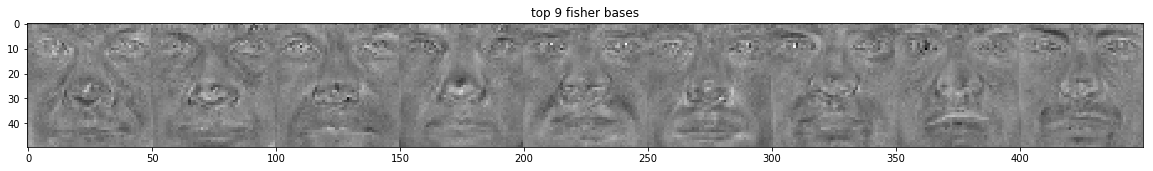

In [1425]:
imgs, trainlabels = load_subset([0])
trainlabels = np.reshape(trainlabels, (70))
trainset = np.reshape(imgs,(70, 2500))
w = fisherTrain(trainset, trainlabels, 10)
displayFishers(w)

meanImage after projecting training data to lower dimension:
(1, 60)
[ 0.00000000e+00 -2.03012210e-14 -1.46168791e-14 -1.29927815e-14
 -9.44006778e-15  6.90241515e-15  5.07530526e-15  8.12048841e-16
 -3.65421978e-15  2.43614652e-15  4.87229305e-15 -1.17747082e-14
 -2.43614652e-15  5.27831747e-15 -1.50229036e-14  1.76620623e-14
 -3.24819536e-15  1.62409768e-15 -1.37033242e-14  1.14701899e-14
 -1.55304341e-14 -5.35444704e-15 -1.21807326e-14 -2.23313431e-15
 -8.37425367e-15 -5.04992873e-15 -8.72952504e-15 -1.92861600e-15
  4.36476252e-15  2.23313431e-15  6.49639073e-15 -3.24819536e-15
 -9.13554946e-15  2.03012210e-15  1.05566349e-14 -2.03012210e-16
  1.08611532e-14  1.82710989e-15  1.01506105e-15  1.01506105e-15
 -9.74458609e-15  9.69383304e-15  7.61295788e-15 -5.32907052e-16
  1.47183852e-15 -5.45595315e-15  5.63358883e-15 -1.13433072e-14
 -4.56777473e-16 -4.56777473e-15 -3.15937752e-15 -7.96822925e-15
 -2.84217094e-15 -8.75490157e-15  8.12048841e-16 -5.02455220e-15
  3.38776626e-15  8.2

error rate using top k W PCA (subset 1)
[81.66666667 47.5        54.16666667 45.83333333 30.83333333 15.
 13.33333333  9.16666667 10.        ]
error rate of W using FLD (subset 1)
[54.16666667 21.66666667 19.16666667 16.66666667 15.         10.
  3.33333333  1.66666667  1.66666667]
error rate using top k W PCA (subset 2)
[89.16666667 70.         84.16666667 82.5        74.16666667 65.83333333
 63.33333333 60.83333333 57.5       ]
error rate of W using FLD (subset 2)
[74.16666667 59.16666667 47.5        43.33333333 36.66666667 42.5
 36.66666667 29.16666667 24.16666667]
error rate using top k W PCA (subset 3)
[90.71428571 89.28571429 89.28571429 86.42857143 85.71428571 82.14285714
 84.28571429 83.57142857 80.        ]
error rate of W using FLD (subset 3)
[87.14285714 82.14285714 76.42857143 79.28571429 78.57142857 80.
 80.         78.57142857 79.28571429]
error rate using top k W PCA (subset 4)
[90.         90.         91.05263158 86.84210526 86.84210526 86.31578947
 86.31578947 86.84210

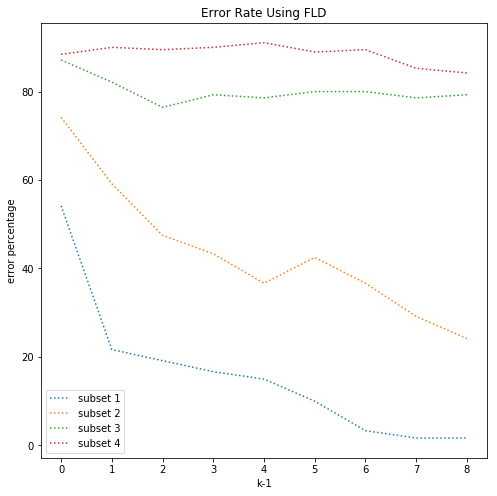

In [1426]:

def fisherTest(trainset,trainlabels,testset,W,mu,k):
    # trainset: 
    #    N × d matrix trainset of vectorized images from subset 0
    # trainlabels:
    #    An N dimensional vector trainlabels that encodes the class 
    #    label of each training image 
    # testset:
    #    M × d matrix testset of M vectorized images from one of 
    #    the test subsets (1-4)
    # W:
    #    Coefficients
    # mu:
    #    Estimated mean
    # k:
    #    number of eigenvectors 
    
    #get top k eigenvectors
#     print(W.shape)
    row_sums = W.sum(axis=1)
    W = W / row_sums[:, np.newaxis]

    top_k_eig = W[0]
    top_k_eig = np.reshape(top_k_eig, (1, 2500))
    
    for i in range(1,  k):
        next_eig = W[i]
        next_eig = np.reshape(next_eig, (1, 2500))
        top_k_eig = np.vstack((top_k_eig, next_eig))
    
#     print(top_k_eig.shape)
    
    top_k_eig = top_k_eig.T
    
    #reduce dimension of trainset and testset (using the Wfld.Wpca)
    
    projected_trainset = trainset - mu
    projected_trainset = np.dot(projected_trainset, top_k_eig)
    
    projected_testset = testset - mu
    projected_testset = np.dot(projected_testset, top_k_eig)
    
    
    #predict labels of the projected testset according to trainset
    testlabels = np.zeros((testset.shape[0],))
    for i in range(0, testlabels.shape[0]):
        #predict each image
        curr_flatten = projected_testset[i]
        
        #find nearest neighbor from the trained classification
        minDistId = trainlabels[0]
        currMinDist = -1
        for j in range(0, trainlabels.shape[0]):
            currDist = np.linalg.norm(projected_trainset[j]-curr_flatten)
            if j == 0:
                minDistId = trainlabels[j]
                currMinDist = currDist
            else:
                if currDist < currMinDist:
                    minDistId = trainlabels[j]
                    currMinDist = currDist
                    
        testlabels[i] = minDistId
        
        
    return testlabels


###################PLOT ERROR RATE ###################
imgs, trainlabels = load_subset([0])
trainlabels = np.reshape(trainlabels, (70))
trainset = np.reshape(imgs,(70, 2500))
w = fisherTrain(trainset, trainlabels, 10)




#SUBSET 1
imgs1, label1 = load_subset([1])
testset = np.reshape(imgs1,(120, 2500))


eigvecs, mu = eigenTrain(trainset, 60)

#plot the errors for k = 1 to k = 9
errors = np.zeros((9))
comparing_eig = np.zeros((9))
for i in range(1, 10):
    
    testlabels = fisherTest(trainset,trainlabels,testset,w,mu,i)
    tb = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    
    errors[i-1] = 100 - np.count_nonzero((np.array(label1)-testlabels) == 0) / len(label1) * 100
    comparing_eig[i-1] = 100 - np.count_nonzero((np.array(label1)-tb) == 0) / len(label1) * 100

print("error rate using top k W PCA (subset 1)")
print(comparing_eig)
print("error rate of W using FLD (subset 1)")
print(errors)

#plot error
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(errors, ":", label = 'subset 1')
ax.set_xlabel("k-1")
# ax.set_xlim(xmin=1)
ax.set_ylabel("error percentage")
plt.title("Error Rate Using FLD")
# plt.show()
# plt.close()


#SUBSET 2
imgs2, label2 = load_subset([2])
testset = np.reshape(imgs2,(120, 2500))

# eigvecs, mu = eigenTrain(trainset, 60)

#plot the errors for k = 1 to k = 9
errors = np.zeros((9))
comparing_eig = np.zeros((9))

for i in range(1, 10):
    testlabels = fisherTest(trainset,trainlabels,testset,w,mu,i)
    tb = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    
    errors[i-1] = 100 - np.count_nonzero((np.array(label2)-testlabels) == 0) / len(label2) * 100
    comparing_eig[i-1] = 100 - np.count_nonzero((np.array(label2)-tb) == 0) / len(label2) * 100

print("error rate using top k W PCA (subset 2)")
print(comparing_eig)
print("error rate of W using FLD (subset 2)")
print(errors)


#plot error
ax.plot(errors, ":", label = 'subset 2')




# #SUBSET 3

imgs3, label3 = load_subset([3])
testset = np.reshape(imgs3,(140, 2500))


#plot the errors for k = 1 to k = 9
errors = np.zeros((9))
comparing_eig = np.zeros((9))

for i in range(1, 10):
    testlabels = fisherTest(trainset,trainlabels,testset,w,mu,i)
    tb = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label3)-testlabels) == 0) / len(label3) * 100
    comparing_eig[i-1] = 100 - np.count_nonzero((np.array(label3)-tb) == 0) / len(label3) * 100

print("error rate using top k W PCA (subset 3)")
print(comparing_eig)
print("error rate of W using FLD (subset 3)")
print(errors)

#plot error
ax.plot(errors, ":", label = 'subset 3')




#SUBSET 4

imgs4, label4 = load_subset([4])
testset = np.reshape(imgs4,(190, 2500))

#plot the errors for k = 1 to k = 9
errors = np.zeros((9))
comparing_eig = np.zeros((9))

for i in range(1, 10):
    testlabels = fisherTest(trainset,trainlabels,testset,w,mu,i)
    tb = eigenTest(trainset,trainlabels,testset,eigvecs,mu,i)
    errors[i-1] = 100 - np.count_nonzero((np.array(label4)-testlabels) == 0) / len(label4) * 100
    comparing_eig[i-1] = 100 - np.count_nonzero((np.array(label4)-tb) == 0) / len(label4) * 100

print("error rate using top k W PCA (subset 4)")
print(comparing_eig)
print("error rate of W using FLD (subset 4)")
print(errors)

#plot error
ax.plot(errors, ":", label = 'subset 4')






ax.legend()
plt.show()
plt.close()